In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

import warnings                    
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("Credit Card Fraud Detection (Cleaned Data).xlsx")
df

TransactionType  Location  IsFraud  Amount_Category  \
0                    1         7        0                5   
1                    1         1        0                3   
2                    0         4        0                1   
3                    0         5        0                4   
4                    0         6        0                1   
...                ...       ...      ...              ...   
99995                1         7        0                2   
99996                1         7        0                1   
99997                0         7        0                4   
99998                0         5        0                4   
99999                1         2        0                2   

       MerchantID_Category  
0                        7  
1                        2  
2                        4  
3                       10  
4                        5  
...                    ...  
99995                    3  
99996                    8  
99997                    7  
99998                    7  
99999                    7  

[100000 rows x 5 columns]

In [3]:
x = df.drop("IsFraud",axis=1)
y = df["IsFraud"]

**Random State Number**

In [4]:
train = []
test = []
cv = []

for i in range(0,101):
    from sklearn.model_selection import train_test_split
    x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state = i)

    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression()
    log.fit(x_train,y_train)

    y_pred_train = log.predict(x_train)
    y_pred_test = log.predict(x_test)

    from sklearn.metrics import accuracy_score
    train.append(accuracy_score(y_train,y_pred_train))
    test.append(accuracy_score(y_test, y_pred_test))

    from sklearn.model_selection import cross_val_score
    cv.append(cross_val_score(log,x_train,y_train,cv=5,scoring="accuracy").mean())

em = pd.DataFrame({"train":train,"test":test,"cv":cv})
gm = em[(abs(em["train"]-em["test"])<=0.05)&(abs(em["test"]-em["cv"])<=0.05)]
print("best_random_number:",gm[gm["cv"]==gm["cv"].max()].index.to_list()[0])

best_random_number: 23


**Train-Test-Split**

In [5]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=23 )

In [6]:
y_train.value_counts()

IsFraud
0    79225
1      775
Name: count, dtype: int64

**Imbalance Dataset handling**

In [7]:
from imblearn.under_sampling import RandomUnderSampler
rs = RandomUnderSampler(random_state=23 )
x_train, y_train = rs.fit_resample(x_train, y_train)


y_train.value_counts()

IsFraud
0    775
1    775
Name: count, dtype: int64

## Modelling & Evaluation

**Logistic Regression**

In [9]:
from sklearn.linear_model import LogisticRegression
l = LogisticRegression()
l.fit(x_train,y_train)

y_train_pred = l.predict(x_train)
print("Train_accuracy: ",accuracy_score(y_train,y_train_pred))

print("cross_validation: ",cross_val_score(l,x_train,y_train,cv=5,scoring="accuracy").mean())

y_test_pred = l.predict(x_test)
print("test_accuracy: ",accuracy_score(y_test,y_test_pred))

Train_accuracy:  0.5064516129032258
cross_validation:  0.48193548387096774
test_accuracy:  0.4883


In [10]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test_pred,y_test)

0.4991009358880972

**KNN**

**Finding Best N-Neightbours**

In [11]:
from sklearn.neighbors import KNeighborsClassifier
estimator = KNeighborsClassifier()
param_grid = {"n_neighbors":list(range(1,100))}

from sklearn.model_selection import GridSearchCV
cv_classifier = GridSearchCV(estimator,param_grid,cv=5,scoring="accuracy")

cv_classifier.fit(x_train,y_train)

cv_classifier.best_params_

{'n_neighbors': 47}

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=47)
knn.fit(x_train,y_train)

y_pred_train = knn.predict(x_train)
print("train_accuracy: ",accuracy_score(y_train,y_pred_train))

print("cross_validation: ",cross_val_score(knn,x_train,y_train,cv=5,scoring="accuracy").mean())

y_pred_test = knn.predict(x_test)
print("test_accuracy: ",accuracy_score(y_test,y_pred_test))

train_accuracy:  0.5574193548387096
cross_validation:  0.5148387096774194
test_accuracy:  0.51415


**SVM**

**Finding Best Parameters-**

In [14]:
from sklearn.svm import SVC

estimator = SVC()
param_grid = {"C":[0.01,0.1,1,10],"kernel":["linear","poly","rbf","sigmoid"]}

svm_grid= GridSearchCV(estimator,param_grid,scoring = "accuracy",cv=5)
svm_grid.fit(x_train,y_train)

svm_grid.best_params_

{'C': 0.1, 'kernel': 'poly'}

In [15]:
from sklearn.svm import SVC
s_pca = SVC(C=0.1,kernel="poly")
s_pca.fit(x_train,y_train)

y_pred_train = s_pca.predict(x_train)
print("train_accuracy: ",accuracy_score(y_train,y_pred_train))

print("cross_validation: ",cross_val_score(s_pca,x_train,y_train,cv=5,scoring="accuracy").mean())

y_pred_test = s_pca.predict(x_test)
print("test_accuracy: ",accuracy_score(y_test,y_pred_test))

train_accuracy:  0.5219354838709678
cross_validation:  0.5109677419354839
test_accuracy:  0.30765


**Decision Tree**

In [25]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
dt = DecisionTreeClassifier(random_state=23)
dt.fit(x_train,y_train)

y_pred_train = dt.predict(x_train)
y_pred_test = dt.predict(x_test)

print("train_accuracy:",accuracy_score(y_pred_train,y_train))
print("test_accuracy: ",accuracy_score(y_test,y_pred_test))
print("cross_validation:",cross_val_score(dt,x_train,y_train,cv=5,scoring="accuracy").mean())

train_accuracy: 0.7896774193548387
test_accuracy:  0.57745
cross_validation: 0.5006451612903227


In [26]:
dt.feature_importances_

array([0.14062126, 0.35283407, 0.22832836, 0.2782163 ])

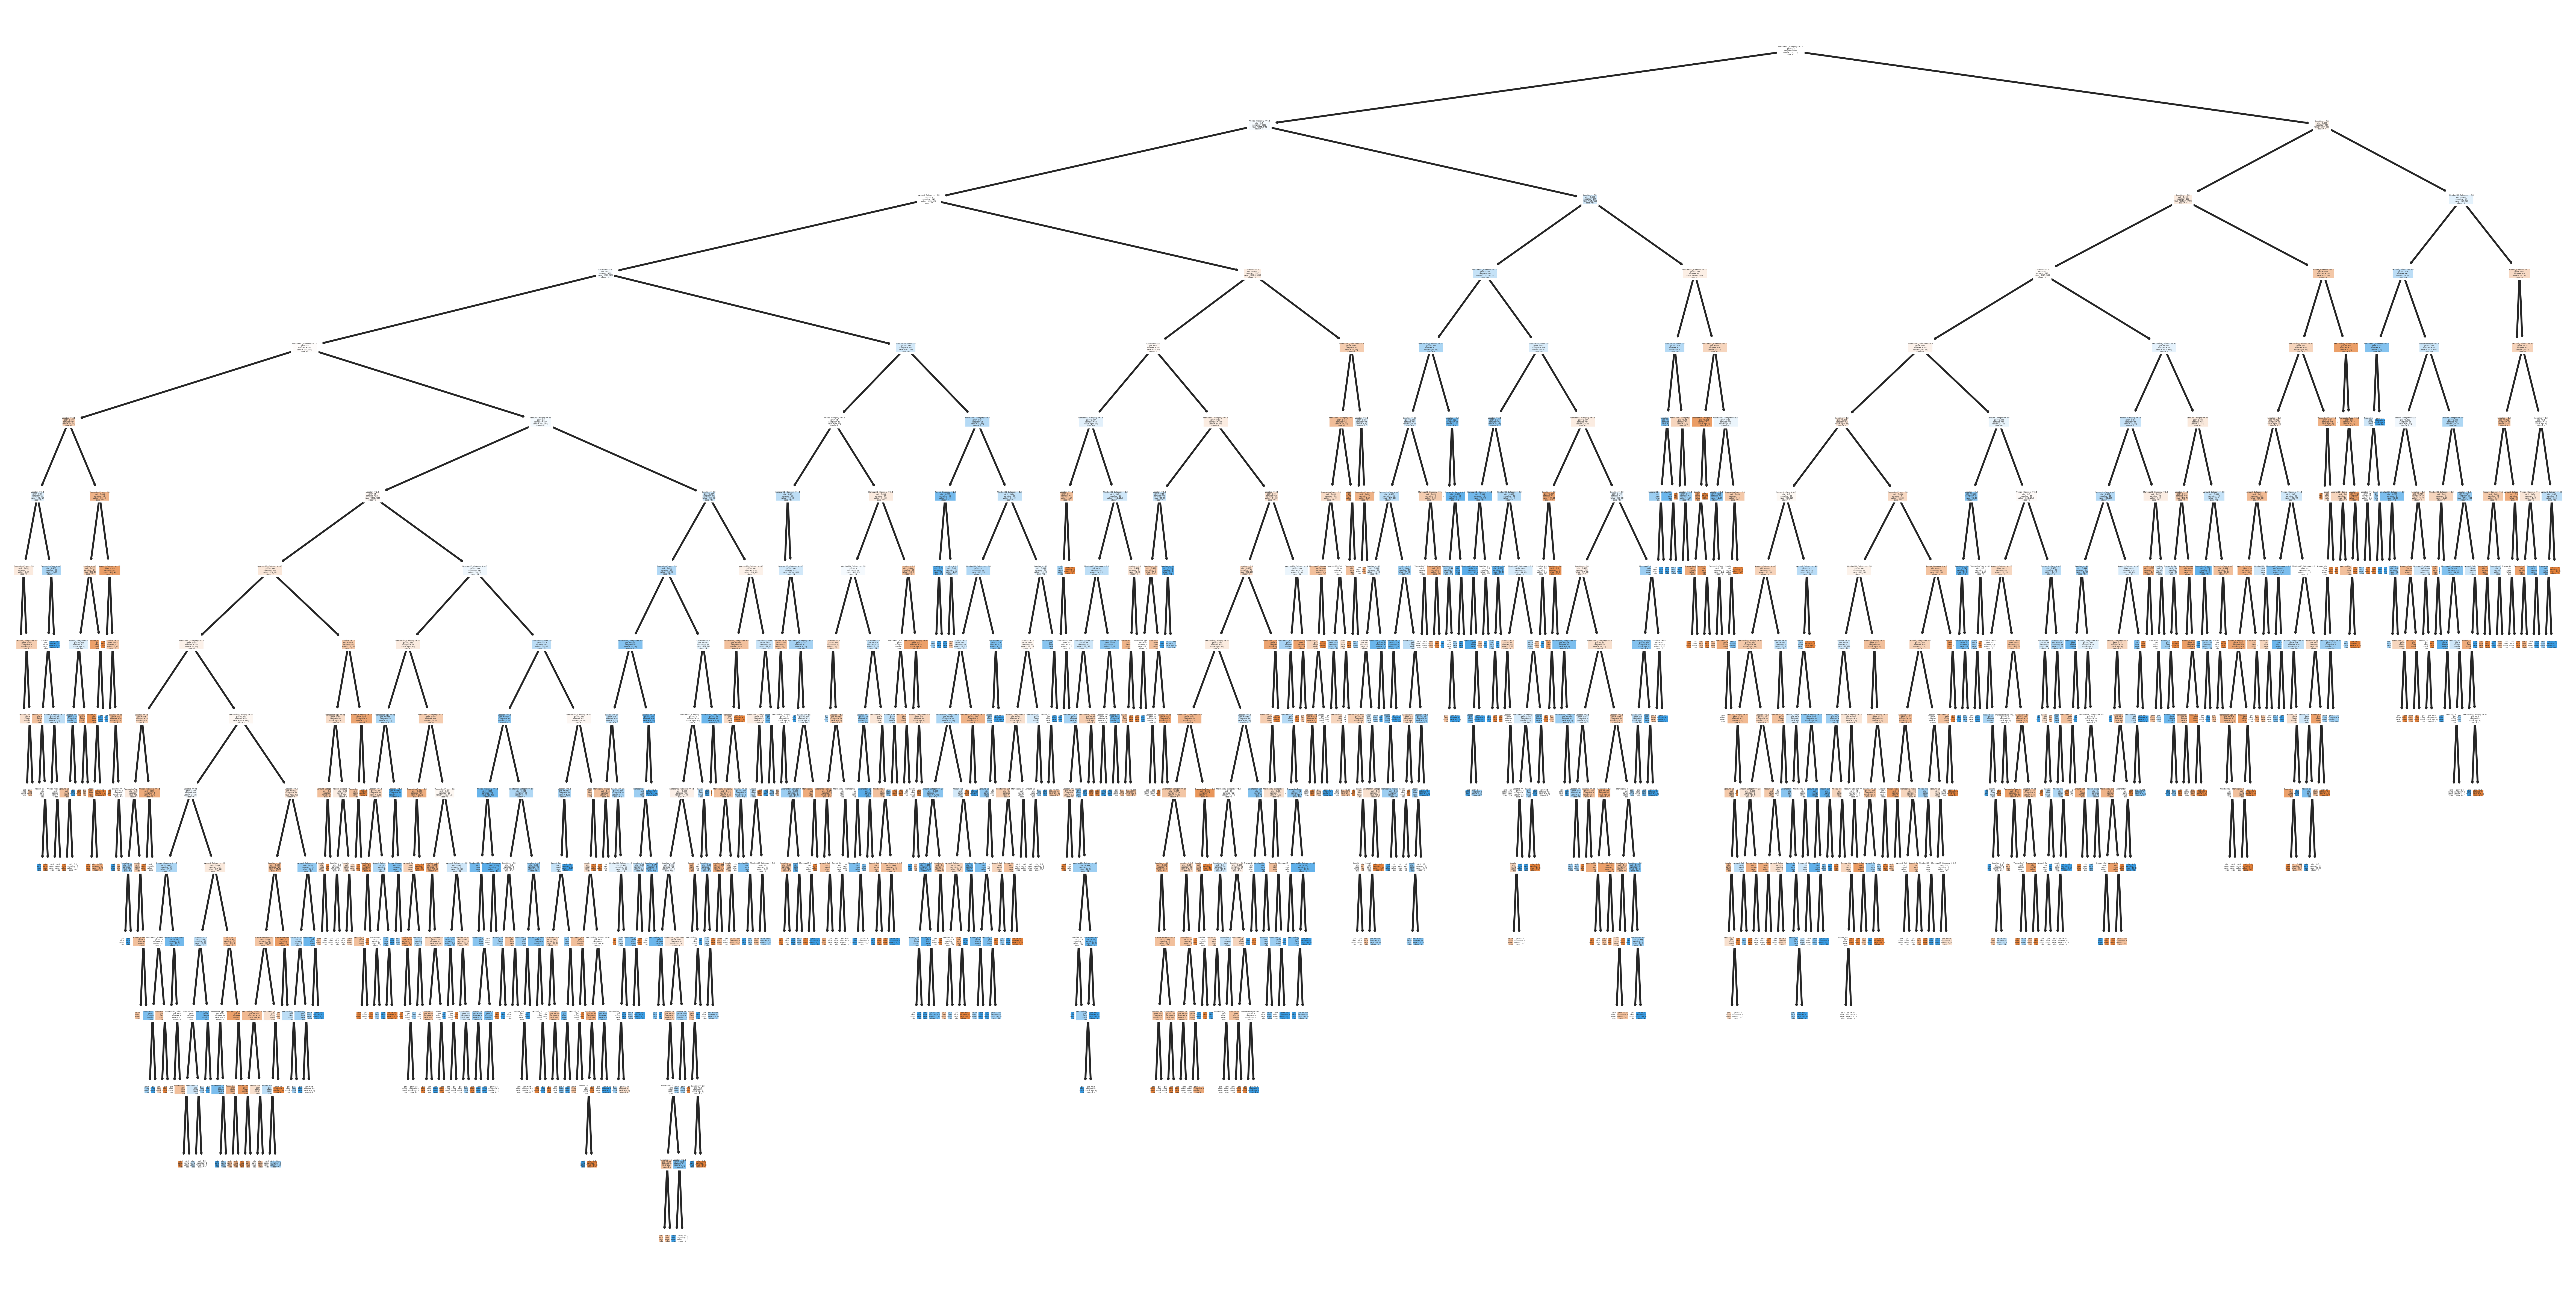

In [29]:
plt.figure(figsize=(24,12),dpi=500)

plot_tree(dt,filled=True,
          feature_names=['TransactionType', 'Location', 'Amount_Category','MerchantID_Category'],class_names=["Y","N"])
plt.show()

In [30]:
estimator = DecisionTreeClassifier(random_state=23 )
param_grid = {"criterion":["gini","entropy"],"max_depth":list(range(1,17))}

grid = GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
grid.fit(x_train,y_train)

grid.best_params_

{'criterion': 'entropy', 'max_depth': 15}

In [31]:
feats = pd.DataFrame(data=grid.best_estimator_.feature_importances_,
                    index=x.columns,
                    columns=["Feature Importance"])
feats
feats_im = feats[feats["Feature Importance"]>0]
imp_features = feats_im.index.to_list()
imp_features

['TransactionType', 'Location', 'Amount_Category', 'MerchantID_Category']

In [32]:
x1= x[imp_features]
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y,train_size=0.8,random_state=23 )

dt = DecisionTreeClassifier(criterion="entropy",max_depth=15,random_state=23 )
dt.fit(x1_train,y1_train)

y1_pred_train = dt.predict(x1_train)
print("train_accuracy:",accuracy_score(y1_train,y1_pred_train))

print("cv:",cross_val_score(dt,x1_train,y1_train,cv=5,scoring="accuracy").mean())

y1_pred_test = dt.predict(x1_test)
print("test_accuracy:",accuracy_score(y1_test,y1_pred_test))

train_accuracy: 0.9903125
cv: 0.9903125000000002
test_accuracy: 0.98875


**Random Forest**

In [33]:
from sklearn.ensemble import RandomForestClassifier

estimator =RandomForestClassifier(random_state=23 )
param_grid = {"n_estimators":list(range(1,10))}

grid = GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
grid.fit(x_train,y_train)
grid.best_params_

{'n_estimators': 4}

In [34]:
grid.best_estimator_.feature_importances_

array([0.076878  , 0.4422422 , 0.24248909, 0.23839072])

In [35]:
feats = pd.DataFrame(data=grid.best_estimator_.feature_importances_,
                    index=x_train.columns,
                    columns=["Feature Importance"])
feats
# Determines Features having imp. above 0
feats_im = feats[feats["Feature Importance"]>0]
imp_features = feats_im.index.to_list()
imp_features

['TransactionType', 'Location', 'Amount_Category', 'MerchantID_Category']

In [38]:
x2= x[imp_features]
x2_train,x2_test,y2_train,y2_test = train_test_split(x2,y,train_size=0.8,random_state=23 )

rf = RandomForestClassifier(n_estimators=4,random_state=23 )
rf.fit(x2_train,y2_train)

y2_pred_train = rf.predict(x2_train)
print("train_accuracy:",accuracy_score(y2_train,y2_pred_train))

print("cv:",cross_val_score(rf,x2_train,y2_train,cv=5,scoring="accuracy").mean())

y2_pred_test = rf.predict(x2_test)
print("test_accuracy:",accuracy_score(y2_test,y2_pred_test))

train_accuracy: 0.9903125
cv: 0.9903125000000002
test_accuracy: 0.98875


**AdaBoost**

In [37]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
ab= AdaBoostClassifier()
param_grid_ab = {"n_estimators":list(range(1,100))}

grid_ab = GridSearchCV(ab,param_grid_ab,cv=5,scoring="accuracy")
grid_ab.fit(x_train,y_train)

grid_ab.best_params_

{'n_estimators': 2}

In [39]:
grid_ab.best_estimator_.feature_importances_

array([0., 0., 0., 1.])

In [40]:
feats = pd.DataFrame(data=grid_ab.best_estimator_.feature_importances_,
                    index=x.columns,
                    columns=["Feature Importance"])
feats
feats_im = feats[feats["Feature Importance"]>0]
imp_features = feats_im.index.to_list()
imp_features

['MerchantID_Category']

In [52]:
x3= x[imp_features]
x3_train,x3_test,y3_train,y3_test = train_test_split(x3,y,train_size=0.8,random_state=23 )

ab = AdaBoostClassifier(n_estimators=2 ,random_state=23 )
ab.fit(x3_train,y3_train)

y3_pred_train = ab.predict(x3_train)
print("train_accuracy:",accuracy_score(y3_train,y3_pred_train))

print("cv:",cross_val_score(ab,x3_train,y3_train,cv=5,scoring="accuracy").mean())

y3_pred_test = ab.predict(x3_test)
print("test_accuracy:",accuracy_score(y3_test,y3_pred_test))

train_accuracy: 0.9903125
cv: 0.9903125000000002
test_accuracy: 0.98875


**Gradient Boost**

In [43]:
gb= GradientBoostingClassifier()
param_grid_gb = {"n_estimators":[1,5,10,20,30],
                "learning_rate":[0.1,0.2,0.3,0.4,0.5,0.8,1]}

grid_gb = GridSearchCV(gb,param_grid_gb,cv=5,scoring="accuracy")
grid_gb.fit(x_train,y_train)

grid_gb.best_params_

{'learning_rate': 1, 'n_estimators': 5}

In [44]:
grid_gb.best_estimator_.feature_importances_

array([0.07459356, 0.35665227, 0.23530516, 0.33344901])

In [45]:
feats_gb = pd.DataFrame(data=grid_gb.best_estimator_.feature_importances_,
                    index=x.columns,
                    columns=["Feature Importance"])
feats_im = feats_gb[feats_gb["Feature Importance"]>0]
imp_features = feats_im.index.to_list()
imp_features

['TransactionType', 'Location', 'Amount_Category', 'MerchantID_Category']

In [53]:
x4= x[imp_features]
x4_train,x4_test,y4_train,y4_test = train_test_split(x4,y,train_size=0.8,random_state=23 ) 

gb = GradientBoostingClassifier(n_estimators=5 ,learning_rate=1 )
gb.fit(x4_train,y4_train)

y4_pred_train = gb.predict(x4_train)
print("train_accuracy:",accuracy_score(y4_train,y4_pred_train))

print("cv:",cross_val_score(gb,x4_train,y4_train,cv=5,scoring="accuracy").mean())

y4_pred_test = gb.predict(x4_test)
print("test_accuracy:",accuracy_score(y4_test,y4_pred_test))

train_accuracy: 0.9903125
cv: 0.9903125000000002
test_accuracy: 0.98875


**XGBoost Classifier**

In [49]:
from xgboost import XGBClassifier
estimator_xgb = XGBClassifier()

param_grid = {"n_estimators":[10,20,40,100],
             "max_depth":[3,4,5],
             "gamma":[0,0.15,0.3,0.5,1]}

grid_xgb = GridSearchCV(estimator_xgb,param_grid,cv=5,scoring="accuracy")
grid_xgb.fit(x_train,y_train)

grid_xgb.best_params_

{'gamma': 0, 'max_depth': 3, 'n_estimators': 10}

In [55]:
f_xgb = pd.DataFrame(data=grid_xgb.best_estimator_.feature_importances_,
                    index=x.columns,
                    columns=["Importance"])
imp_features_list_xgb = f_xgb[f_xgb["Importance"]>0].index.to_list()

In [56]:
imp_features_list_xgb

['TransactionType', 'Location', 'Amount_Category', 'MerchantID_Category']

In [54]:
x5=x[imp_features_list_xgb]

x5_train,x5_test,y5_train,y5_test = train_test_split(x5,y,train_size=0.8,random_state=23 )

xgb=XGBClassifier(gamma=0, max_depth=3 ,n_estimators=10)
xgb.fit(x5_train,y5_train)

y5_pred_train = xgb.predict(x5_train)
print("train_accuracy:",accuracy_score(y5_train,y5_pred_train))

print("cv:",cross_val_score(xgb,x5_train,y5_train,cv=5,scoring="accuracy").mean())

y5_pred_test = xgb.predict(x5_test)
print("test_accuracy:",accuracy_score(y5_test,y5_pred_test))

train_accuracy: 0.9903125
cv: 0.9903125000000002
test_accuracy: 0.98875


In [ ]:
DT

train_accuracy: 0.9903125
cv: 0.9903125000000002
test_accuracy: 0.98875

RF

train_accuracy: 0.9903125
cv: 0.9903125000000002
test_accuracy: 0.98875

AdaBoost

train_accuracy: 0.9903125
cv: 0.9903125000000002
test_accuracy: 0.98875

GradientBoost

train_accuracy: 0.9903125
cv: 0.9903125000000002
test_accuracy: 0.98875

XGBoost

train_accuracy: 0.9903125
cv: 0.9903125000000002
test_accuracy: 0.98875

* Here, all the algorithms provide the same accuracy. Hence, Decision Tree will be selected because it takes the least processing time.